# Create and train network

create and train network

In [1]:
import csv

dim = 10
size = pow(2, dim)

data_file = open(f'data{dim}.csv', mode='r')
dreader = csv.reader(data_file, delimiter=',')

target_file = open(f'target{dim}.csv', mode='r')
treader = csv.reader(target_file, delimiter=',')

In [2]:
data = []
target = []
for row in dreader:
    y = []
    for x in row:
        y.append(float(x))
    data.append(y)
    
for row in treader:
    y = []
    for x in row:
        y.append(float(x))
    target.append(y)
    

In [3]:
import time
import random
from neural.neuralNetwork import neuralNetwork

input_nodes = dim
hidden_nodes = dim * 16
output_nodes = dim + 1
# learning rate is 0.3
learning_rate = 0.3
# create instance of neural network
nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# start traing sessions
sessions = 200
nst = int(size / 2) 

x = []
y_avg = []
y_min = []
y_dev = []

ind = list(range(size))
random.shuffle(ind)
t_start = time.time()
for js in range(sessions):
    tind = ind[:size - nst]
    random.shuffle(tind)
    for i in range(size - nst):
        nn.train(data[tind[i]], target[tind[i]])
    if True:
        ss = 0.0
        ss2 = 0.0
        min = 1.0
        nst = 100
        for i in range(size - nst, size):
            res = nn.query(data[ind[i]])
            s = 0.0
            for j in range(dim + 1):
                s += res[j, 0]*target[ind[i]][j]
            y = []
            z = []
            for j in range(dim + 1):
                y.append(format(res[j,0], '.1f'))
            for k in target[ind[i]]:
                z.append(format(k, '.1f'))
            ss += s
            ss2 += s*s
            if s < min:
                min = s
        avg = ss / nst
        var = ss2 / nst
        dev = pow(var - avg*avg, 0.5)
        print('avg=', format(avg, '0.3f'), " dev=", format(dev, '0.3f'), " min=", format(min, '0.3f'))
        x.append(js)
        y_avg.append(avg)
        y_min.append(min)
        y_dev.append(avg - dev)
t = time.time() - t_start
print ("Training done, it took ", t, " secs")

avg= 0.188  dev= 0.148  min= 0.038
avg= 0.240  dev= 0.147  min= 0.074
avg= 0.288  dev= 0.157  min= 0.084
avg= 0.344  dev= 0.202  min= 0.097
avg= 0.394  dev= 0.238  min= 0.072
avg= 0.332  dev= 0.220  min= 0.132
avg= 0.321  dev= 0.217  min= 0.131
avg= 0.324  dev= 0.209  min= 0.067
avg= 0.308  dev= 0.227  min= 0.080
avg= 0.364  dev= 0.198  min= 0.065
avg= 0.316  dev= 0.208  min= 0.102
avg= 0.346  dev= 0.243  min= 0.118
avg= 0.309  dev= 0.180  min= 0.108
avg= 0.275  dev= 0.205  min= 0.075
avg= 0.274  dev= 0.194  min= 0.103
avg= 0.292  dev= 0.175  min= 0.094
avg= 0.331  dev= 0.173  min= 0.098
avg= 0.411  dev= 0.233  min= 0.082
avg= 0.394  dev= 0.168  min= 0.109
avg= 0.345  dev= 0.202  min= 0.092
avg= 0.384  dev= 0.241  min= 0.063
avg= 0.396  dev= 0.269  min= 0.044
avg= 0.357  dev= 0.284  min= 0.047
avg= 0.435  dev= 0.193  min= 0.129
avg= 0.427  dev= 0.229  min= 0.131
avg= 0.462  dev= 0.195  min= 0.079
avg= 0.552  dev= 0.224  min= 0.050
avg= 0.545  dev= 0.227  min= 0.074
avg= 0.590  dev= 0.2

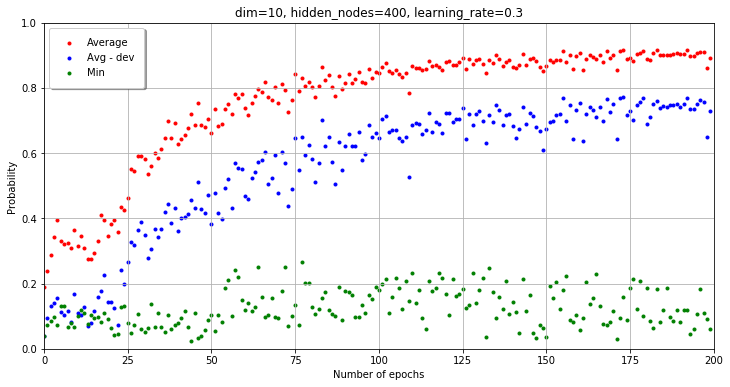

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
ax = plt.axes()
plt.scatter(x, y_avg, marker='.', color='red', label='Average')
plt.scatter(x, y_dev, marker='.', color='blue', label='Avg - dev')
plt.scatter(x, y_min, marker='.', color='green', label='Min')
plt.xlim(0, sessions)
plt.ylim(0, 1)
plt.xlabel('Number of epochs')
plt.ylabel('Probability')
plt.title('dim=10, hidden_nodes=400, learning_rate=0.3')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);


In [5]:
plt.savefig('d10-hn400.png')

<Figure size 432x288 with 0 Axes>